**Information:** *Apply the concepts of generalization and regularization to Linear Regression*

**Written by:** *Zihao Xu*

**Last update date:** *06.08.2021*

# Generalization for Polynomial Regression
Here is a simple example showing the concepts of overfitting and underfitting. Here directly use the **``Scikit-Learn``** package for convenience.

## Generate Dataset
Try to fit a linear regression model to the data generated from
$$y_i=-0.5+1.5x_i-2\frac{x_i^2}{2!}+2.5\frac{x_i^3}{3!}+2\epsilon_i$$
where $\epsilon_i\sim\mathcal{N}(0,1)$ and we sample $x_i\sim U([-4,4])$

First generate the dataset and visualize it

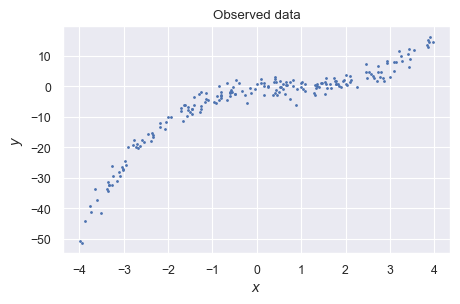

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Ensure reproducibility
np.random.seed(123)
# Plot setting
sns.set()
sns.set_context('paper')

# Size of training set and validation set
num_train, num_test = 160, 40
# Number of total observations
num_obs = num_train + num_test
# Sample x
x = (8 * np.random.rand(num_obs) - 4.0).reshape(-1, 1)
# True parameters
theta_true = np.array([-0.5, 1.5, -2, 2.5]).reshape(-1, 1)
# Get the polynomial featurtes
y = - 0.5 + 1.5 * x - 2 * x ** 2 / 2 + 2.5 * x ** 3 / 6\
+ 2 * np.random.randn(num_obs).reshape(-1,1)
# Visualize the dataset
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x, y, '.', markersize=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Observed data')
plt.show()

## Split training set and validation set
The naive way is to simply divide the observations into two parts

Shape of train set:		 (160, 1)
Shape of validation set:	 (40, 1)


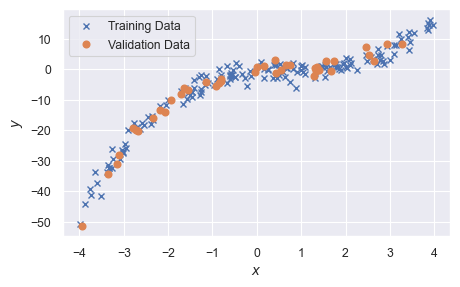

In [2]:
# Get x and y zipped
data = np.concatenate((x, y), axis=1)
# Randomly permute rows
data_permuted = np.random.permutation(data)
# Split in a training set by picking the first num_train rows
data_train = data_permuted[:num_train]
# Split in a validation set
data_val = data_permuted[num_train:]
# Get x_train and y_train
x_train = data_train[:, 0].reshape(-1, 1)
y_train = data_train[:, 1].reshape(-1, 1)
# Get x_val and y_val
x_val = data_val[:, 0].reshape(-1, 1)
y_val = data_val[:, 1].reshape(-1, 1)
# Sanity check
print('Shape of train set:\t\t', x_train.shape)
print('Shape of validation set:\t', x_val.shape)
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x_train, y_train, 'x', label='Training Data')
ax.plot(x_val, y_val, 'o', label='Validation Data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

We can also use the **[``train_test_split``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)** utility in **``Scikit-Learn``** to separate the training set and validation set easily

Shape of train set:		 (160, 1)
Shape of validation set:	 (40, 1)


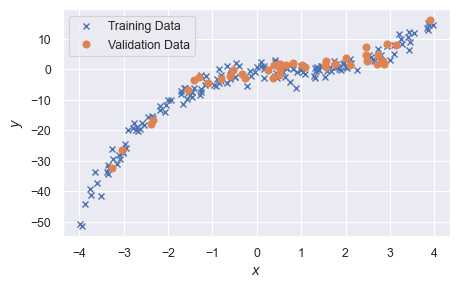

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = \
train_test_split(x,y,test_size=0.2,random_state=123)
# Sanity check
print('Shape of train set:\t\t', x_train.shape)
print('Shape of validation set:\t', x_val.shape)
fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.plot(x_train, y_train, 'x', label='Training Data')
ax.plot(x_val, y_val, 'o', label='Validation Data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best')
plt.show()

## Train and validation
Let's find the best polynomial degree by training and validation

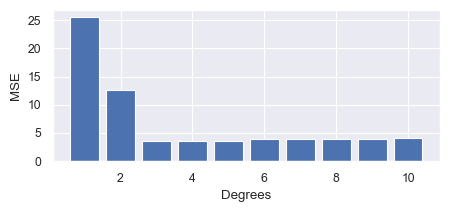

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Try with different degree
degrees = np.arange(1, 11)
MSE = []
Estimator = []
for index, degree in enumerate(degrees):
    # Assign the regression model and preprocessing method
    estimator = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Fit with the created model
    estimator.fit(x_train, y_train)
    # See the performance on evaluation points
    y_pred = estimator.predict(x_val).reshape(-1, 1)
    # Calculate the validation MSE
    loss = np.sum((y_pred - y_val)**2) / y_pred.shape[0]
    Estimator.append(estimator)
    MSE.append(loss)
# Plot out the MSE for different degrees
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
ax.bar(range(1, len(MSE) + 1), MSE)
ax.set_xlabel('Degrees')
ax.set_ylabel('MSE')
plt.show()

It seems that the MSEs for degree $1$ and $2$ are so huge that we should not plot them together wit other degrees

Degree 3 gives the minimized validation mean square error.


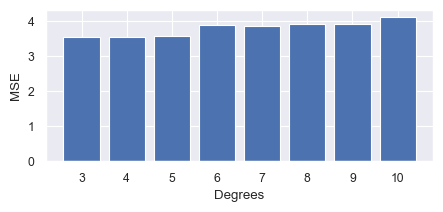

In [5]:
# Get the minimum index
print("Degree %d gives the minimized validation mean square error."%(np.argmin(MSE)+1))
# Plot out the MSE for different degrees
fig, ax = plt.subplots(figsize=(5, 2), dpi=100)
ax.bar(range(3, len(MSE) + 1), MSE[2:])
ax.set_xlabel('Degrees')
ax.set_ylabel('MSE')
plt.show()

## Visualization - Underfitting, Normal fitting and Overfitting
Here shows the visualization of three types of fitting

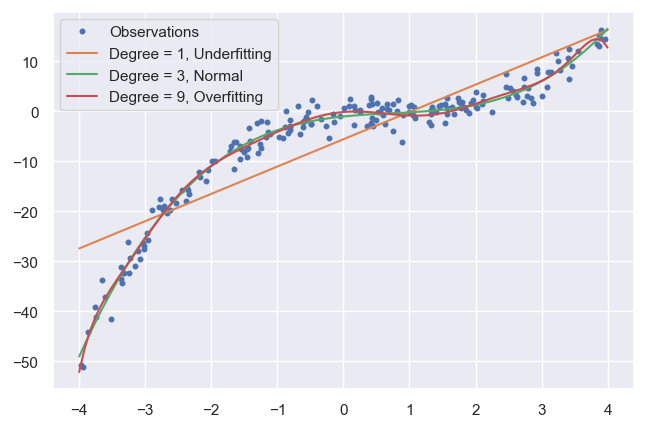

In [6]:
fig, ax = plt.subplots(figsize=(6,4),dpi=125)
xe = np.linspace(-4,4,100).reshape(-1,1)
ye_1 = Estimator[0].predict(xe)
ye_3 = Estimator[2].predict(xe)
ye_10 = Estimator[9].predict(xe)
ax.plot(x,y,'.',label='Observations')
ax.plot(xe,ye_1,label='Degree = 1, Underfitting')
ax.plot(xe,ye_3,label='Degree = 3, Normal')
ax.plot(xe,ye_10,label='Degree = 9, Overfitting')
plt.legend(loc='best')
plt.show()

As shown in the plot, the curve with one degree can not capture the features well and is said to be underfitting. The curve with $9$ degrees shows strange predictions in the region $(3.5,4)$ and is said to be overfitting. The situation would be far more severe when the size of the dataset is smaller.

%%latex
\newpage

# Polynomial Regression with Regularization